In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.special import boxcox1p
import sklearn as sk
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score,RepeatedKFold, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb

In [2]:
#try to avoid warningd 
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [39]:
#importing datasets
dataset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
#i am going to deal firs with outliers with separated datasets for not droping test rows

In [40]:
#features with highest correlation
corr = dataset.corr()
print (corr['SalePrice'].sort_values(ascending=False).head(11))

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Text(0.5,0,'LotArea')

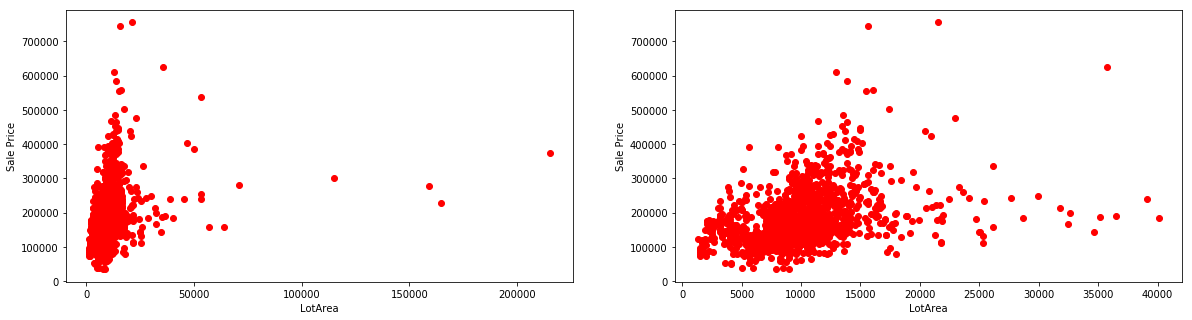

In [41]:
#Before joining the two dataset for feature engineering, we are going to remove some outliers from the trainset
# Something that can not be done with the testset
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["LotArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('LotArea')
mean = dataset["LotArea"].mean()
stan_d = dataset["LotArea"].std()
outlier_gr = dataset[dataset["LotArea"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["LotArea"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["LotArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('LotArea')

Text(0.5,0,'LotFrontage')

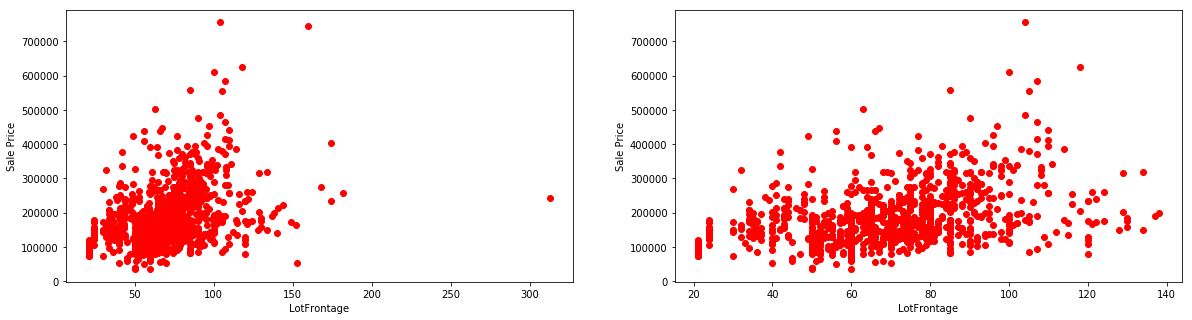

In [42]:
#Before joining the two dataset for feature engineering, we are going to remove some outliers from the trainset
# Something that can not be done with the testset
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["LotFrontage"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('LotFrontage')
mean = dataset["LotFrontage"].mean()
stan_d = dataset["LotFrontage"].std()
outlier_gr = dataset[dataset["LotFrontage"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["LotFrontage"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["LotFrontage"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('LotFrontage')

Text(0.5,0,'OverallQual')

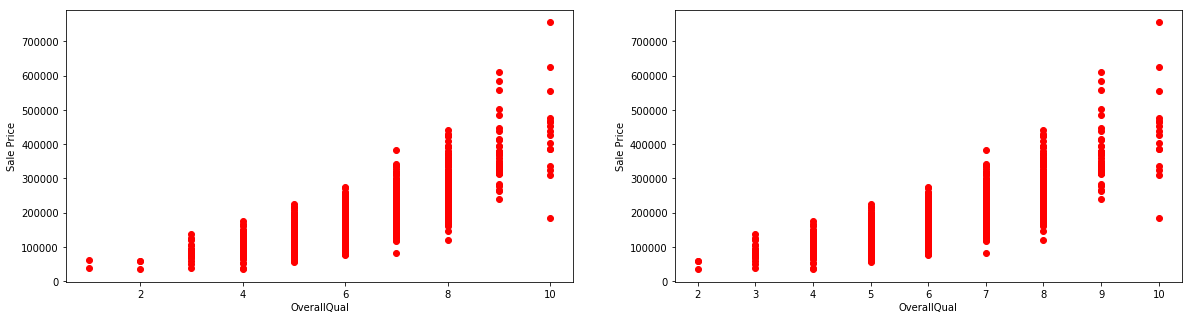

In [43]:
#Before joining the two dataset for feature engineering, we are going to remove some outliers from the trainset
# Something that can not be done with the testset
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["OverallQual"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('OverallQual')
mean = dataset["OverallQual"].mean()
stan_d = dataset["OverallQual"].std()
outlier_gr = dataset[dataset["OverallQual"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["OverallQual"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["OverallQual"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('OverallQual')

Text(0.5,0,'GarageArea')

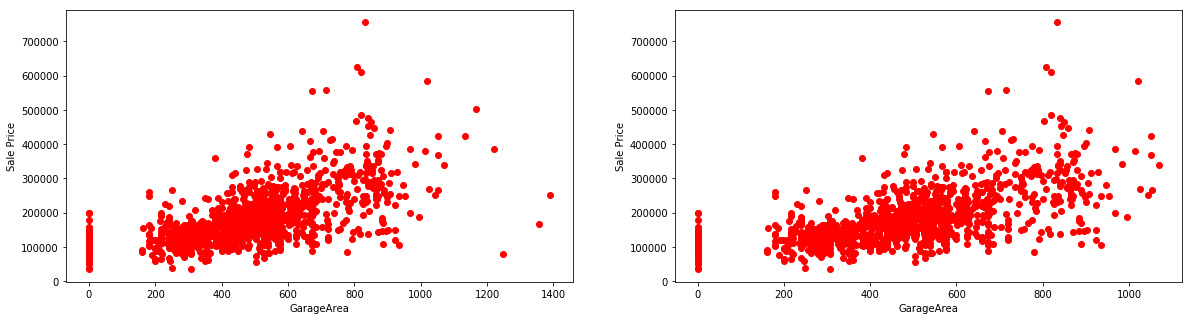

In [44]:
#Before joining the two dataset for feature engineering, we are going to remove some outliers from the trainset
# Something that can not be done with the testset
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["GarageArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')
mean = dataset["GarageArea"].mean()
stan_d = dataset["GarageArea"].std()
outlier_gr = dataset[dataset["GarageArea"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["GarageArea"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["GarageArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('GarageArea')

Text(0.5,0,'TotalBsmtSF')

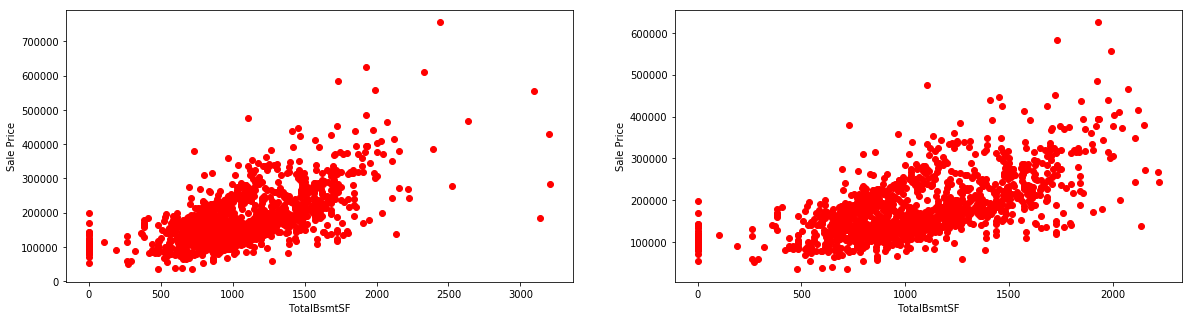

In [45]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["TotalBsmtSF"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')
mean = dataset["TotalBsmtSF"].mean()
stan_d = dataset["TotalBsmtSF"].std()
outlier_gr = dataset[dataset["TotalBsmtSF"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["TotalBsmtSF"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["TotalBsmtSF"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF')


Text(0.5,0,'Gr_Liv_Area')

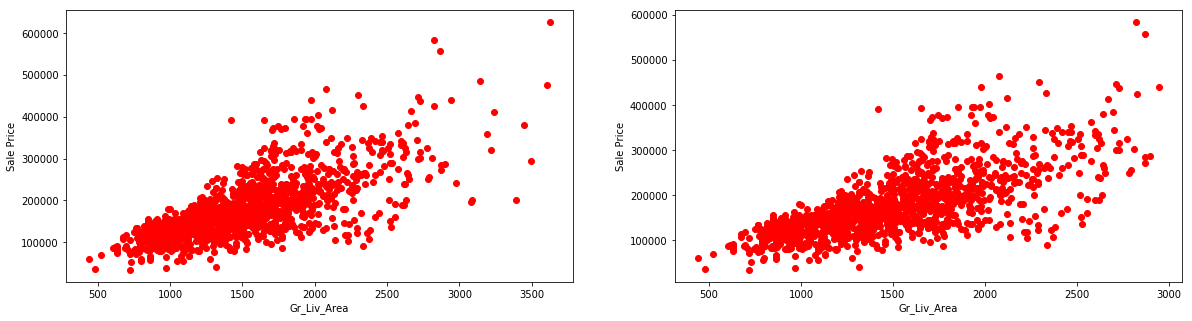

In [46]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["GrLivArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('Gr_Liv_Area')
mean = dataset["GrLivArea"].mean()
stan_d = dataset["GrLivArea"].std()
outlier_gr = dataset[dataset["GrLivArea"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["GrLivArea"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["GrLivArea"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('Gr_Liv_Area')

Text(0.5,0,'1stFlrSF')

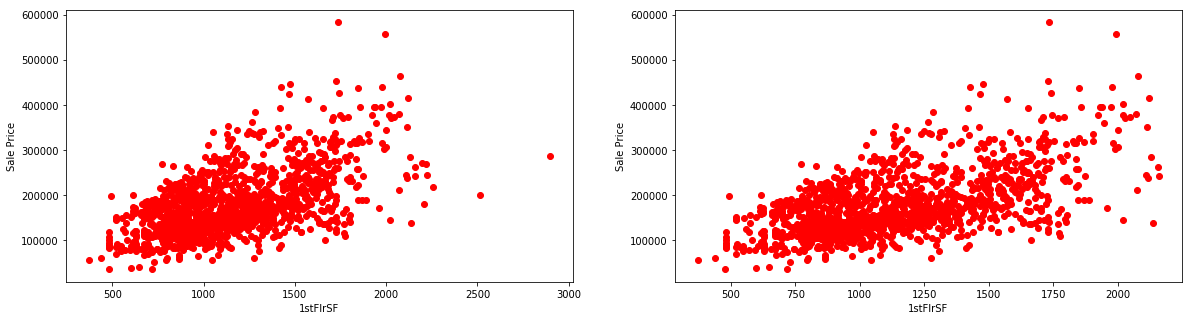

In [47]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
#plt.title(label='With outliers')
plt.plot(dataset["1stFlrSF"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')
mean = dataset["1stFlrSF"].mean()
stan_d = dataset["1stFlrSF"].std()
outlier_gr = dataset[dataset["1stFlrSF"] > mean + 3*stan_d]
outlier_gr = outlier_gr.append(dataset[dataset["1stFlrSF"] < mean - 3*stan_d])
dataset = dataset.drop(outlier_gr.index)
#after removing the outlier
plt.subplot(1,2,2)
#plt.title(label='Without outliers')
plt.plot(dataset["1stFlrSF"], dataset["SalePrice"], "ro")
plt.ylabel('Sale Price')
plt.xlabel('1stFlrSF')

In [48]:
dataset.SalePrice.describe()
#mean and std are very high, we are going to see the skewnes of the sale price dist. and may apply log transformation

count      1399.000000
mean     175447.147963
std       69569.160939
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      207250.000000
max      582933.000000
Name: SalePrice, dtype: float64

In [49]:
#We are going to make a copy of the dataset dataframe for analysis purposes
train_c=dataset.copy()

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness before applying log : 1.328512
Skewness after applying log : 0.006848


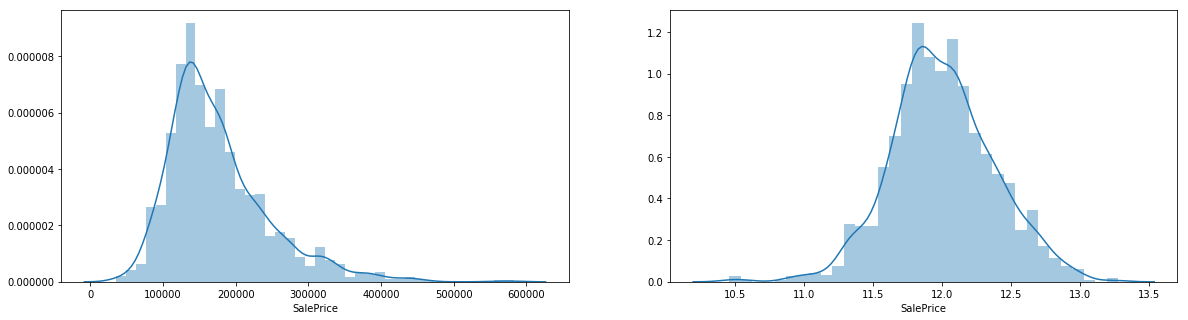

In [50]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(dataset.SalePrice)
print("Skewness before applying log : %f" % dataset.SalePrice.skew())
#apply log because the distribution is skewed as we can se from plotting the distribution, it is right skewed
dataset.SalePrice = np.log1p(dataset['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(dataset.SalePrice)
print("Skewness after applying log : %f" % dataset.SalePrice.skew())

In [51]:
dataset.SalePrice.describe()
#standart deviations and mean are lower and the model can learn easier this way

count    1399.000000
mean       12.003635
std         0.377064
min        10.460271
25%        11.767575
50%        11.982935
75%        12.241685
max        13.275829
Name: SalePrice, dtype: float64

In [52]:
#From now on the data transformation need to be done in both test and train set
#First we are going to save Id of the two datasets
DatasetId = dataset.Id
TestId = testset.Id
train_number = dataset.shape[0]
#We are going to drop the sale price from dataset, 
SalePrice = dataset['SalePrice']
dataset = dataset.drop(['SalePrice'], axis=1)
#concatenating the dataset
data_union = pd.concat((dataset,testset),sort=False).reset_index(drop = True)
print(data_union.shape)

(2858, 80)


In [53]:
#We`ll deal with missing values before going on with other feature modification
Missing = pd.DataFrame({'Missing Values':data_union.isna().sum(), 'Missing Ratio':((data_union.isnull().sum() / len(data_union)) * 100)})
Missing.sort_values(['Missing Ratio'], ascending=False).head(20)
# i am going to drop data with missing ratio more than 80%

,Missing Values,Missing Ratio
PoolQC,2851,99.755073
MiscFeature,2756,96.431071
Alley,2662,93.142057
Fence,2294,80.265920
FireplaceQu,1413,49.440168
LotFrontage,471,16.480056
GarageYrBlt,154,5.388383
GarageFinish,154,5.388383
GarageQual,154,5.388383
GarageCond,154,5.388383


In [54]:
data_union= data_union.drop(['Alley','PoolQC','Fence','MiscFeature','Utilities'], axis = 1) # drop the columns with hig rate of missing values
data_union['LotFrontage'] = data_union['LotFrontage'].fillna(data_union['LotFrontage'].mean())
data_union['BsmtUnfSF'] = data_union['BsmtUnfSF'].fillna(data_union['BsmtUnfSF'].mean()) 

for i in ('GarageArea','GarageCars', 'BsmtHalfBath','FullBath','HalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtFinSF2', 'BsmtFinSF1'):
    data_union[i] = data_union[i].fillna(0) #replace by 0, 0 has a meaning here

for i in ('MSZoning', 'KitchenQual', 'Exterior1st', 'Functional', 'SaleType','Electrical', 'MasVnrArea','MasVnrType','Electrical','HeatingQC','GarageYrBlt',):
    data_union[i] = data_union[i].fillna(data_union[i].value_counts().idxmax()) # replace by mode

for i in ('FireplaceQu','Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond'):
    data_union[i] = data_union[i].fillna('No') # replace with NO, no has a meaning 
#all missing values are replaced
#All the replacement are done by studying the type of variable and it`s meanin, we did this by reading the dataset description

In [55]:
#we are going to analyse some variables by using the copy of the dataset that we did before
#First i am going to create two variables tha i think may be useful
# adding new features
# 1- total square feet
data_union['TotalSF'] = data_union['TotalBsmtSF'] + data_union['1stFlrSF'] + data_union['2ndFlrSF']
train_c['TotalSF'] = train_c['TotalBsmtSF'] + train_c['1stFlrSF'] + train_c['2ndFlrSF']
# 2- Sale season, 4 example spring season, winter season, summer ,etc.
#this is more a binning of MoSold than a new variable
data_union['Season'] = data_union['MoSold']
data_union['Season'] = data_union['Season'].astype(str)
train_c['Season'] = train_c['MoSold']
train_c['Season'] = train_c['Season'].astype(str)

In [56]:
print(data_union.shape)

(2858, 77)


In [57]:
data_union = pd.DataFrame(data_union)
data_union.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Season
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,2566.0,2
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,2524.0,5
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,2706.0,9
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,2473.0,2
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,3343.0,12


In [58]:
data_union.iloc[[2],[76]].values

array([['9']], dtype=object)

In [59]:
#Giving values to season
for i in range(0,2858):
    if (data_union.iloc[[i],[76]].values == '1' or data_union.iloc[[i],[76]].values =='2' or data_union.iloc[[i],[76]].values == '12'):
        data_union.iloc[[i],[76]] = 'Winter' 
for i in range(0,2858):
    if (data_union.iloc[[i],[76]].values == '3' or data_union.iloc[[i],[76]].values =='4' or data_union.iloc[[i],[76]].values == '5'):
        data_union.iloc[[i],[76]] = 'Spring'
for i in range(0,2858):
    if (data_union.iloc[[i],[76]].values == '6' or data_union.iloc[[i],[76]].values =='7' or data_union.iloc[[i],[76]].values == '8'):
        data_union.iloc[[i],[76]] = 'Summer'
for i in range(0,2858):
    if (data_union.iloc[[i],[76]].values == '9' or data_union.iloc[[i],[76]].values =='10' or data_union.iloc[[i],[76]].values == '11'):
        data_union.iloc[[i],[76]] = 'Autumn'

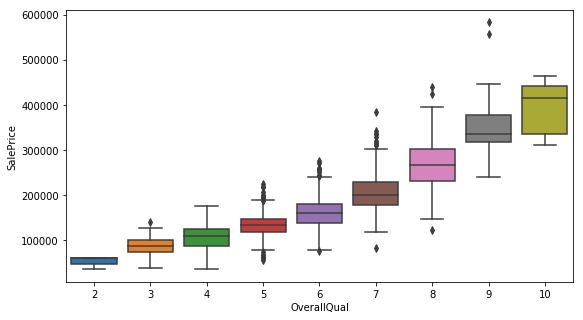

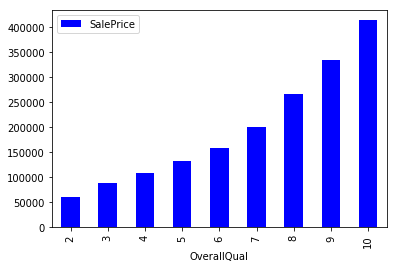

In [60]:
#overall quality and Sale price
quality_pivot = train_c.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train_c)
#Median price associated with the quality
quality_pivot.plot(kind='bar', color='blue')

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


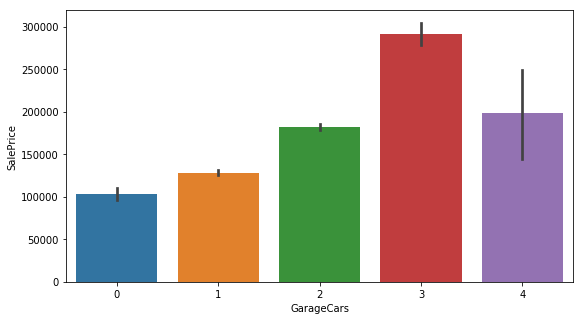

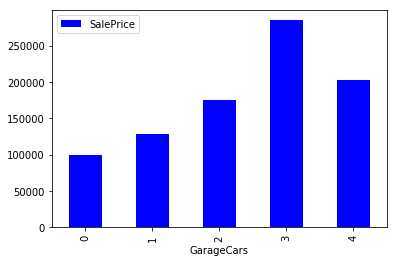

In [61]:
garage_pivot = train_c.pivot_table(index='GarageCars', values='SalePrice', aggfunc=np.median)
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="GarageCars", y="SalePrice", data=train_c)
garage_pivot.plot(kind='bar', color='blue')


/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


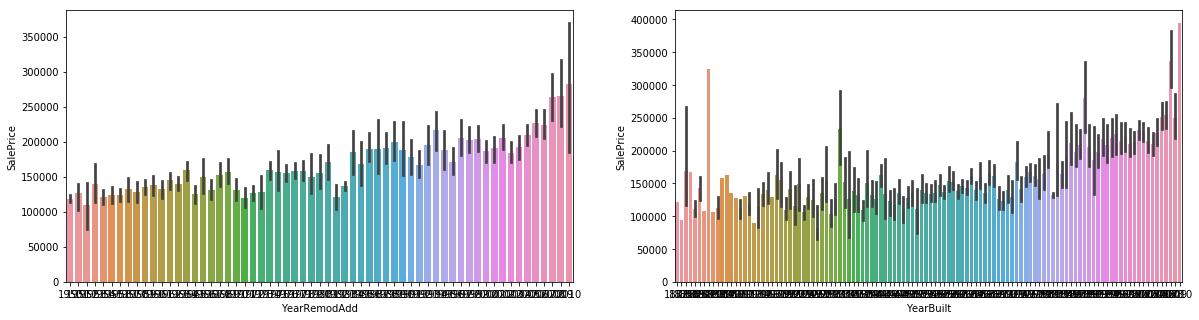

In [62]:
#Year remodelated and Year Built
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="YearRemodAdd", y="SalePrice", data=train_c)
plt.subplot(1, 2, 2)
sns.barplot(x="YearBuilt", y="SalePrice", data=train_c)
#Both have positive relation with Sale price, we are going to create a new variable made of this two
# The new variable will show the difference in year between remodeling an building

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


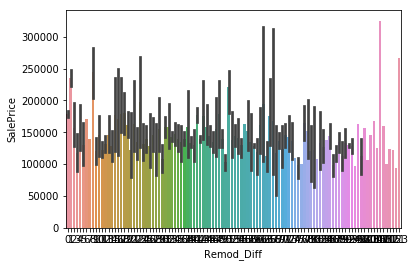

In [63]:
#We will apply changes even on the dataset_union, that`s the most important
train_c['Remod_Diff'] = train_c['YearRemodAdd'] - train_c['YearBuilt']
data_union['Remod_Diff'] = data_union['YearRemodAdd'] - data_union['YearBuilt']
plt.plot(figsize =(20,5))
sns.barplot(x='Remod_Diff', y='SalePrice', data=train_c)

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


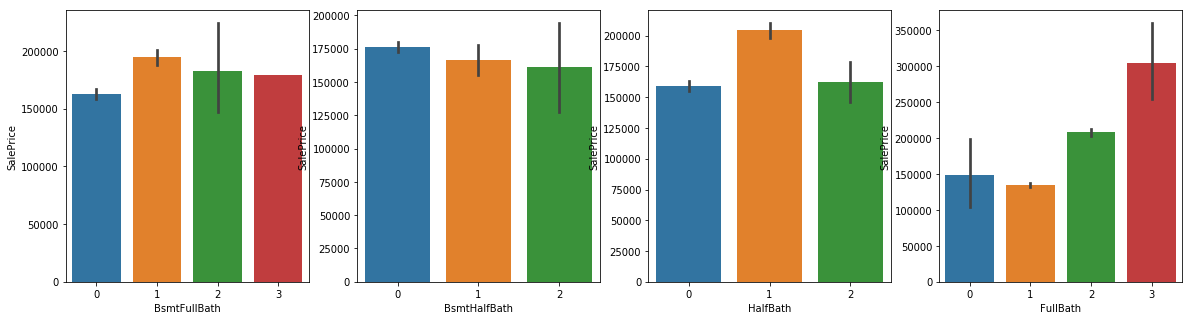

In [64]:
#Bathrooms
plt.subplots(figsize =(20, 5))
plt.subplot(1, 4, 1)
sns.barplot(x="BsmtFullBath", y="SalePrice", data=train_c)
plt.subplot(1, 4, 2)
sns.barplot(x="BsmtHalfBath", y="SalePrice", data=train_c)
plt.subplot(1, 4, 3)
sns.barplot(x="HalfBath", y="SalePrice", data=train_c)
plt.subplot(1, 4, 4)
sns.barplot(x="FullBath", y="SalePrice", data=train_c)
#no need for further changes in this variables

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


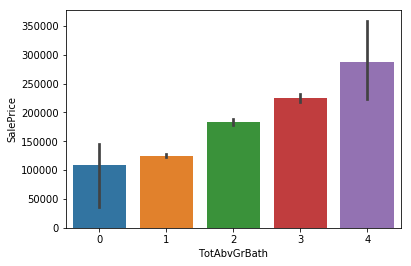

In [65]:
#Creating a variable which shows the total number of bathrooms above the ground
train_c['TotAbvGrBath'] = train_c['FullBath'] + train_c['HalfBath']
data_union['TotAbvGrBath'] = data_union['FullBath'] + dataset['HalfBath']
plt.plot(figsize =(20, 5))
sns.barplot(x="TotAbvGrBath", y="SalePrice", data=train_c)
#It may be helpful, cuz it has a positive relation with the SalePrice

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


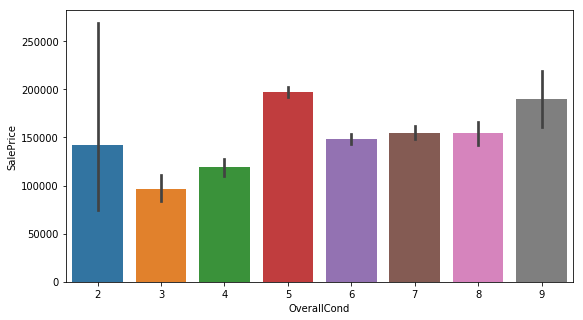

In [66]:
#overall condition
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 2)
sns.barplot(x="OverallCond", y="SalePrice", data=train_c)
# no changes needed

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


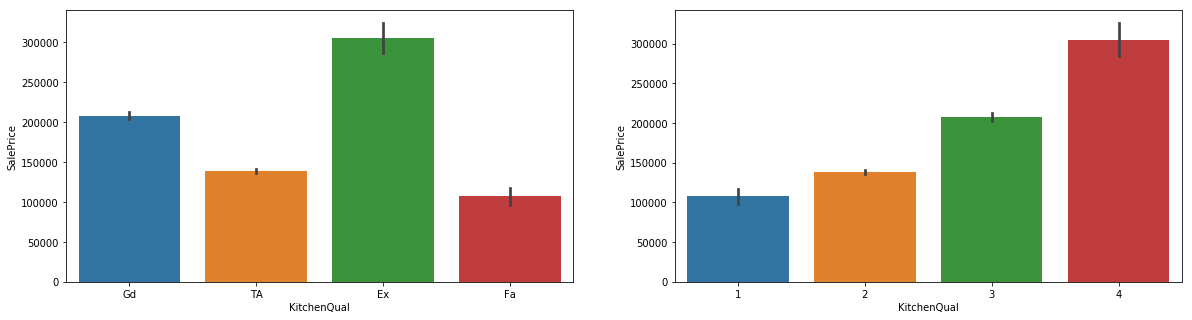

In [67]:
#Kitchen Quality
plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x="KitchenQual", y="SalePrice", data=train_c)
#will labelencode kitchen quality manualy to order it as it should be
data_union['KitchenQual'] = data_union['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
train_c['KitchenQual'] = train_c['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
plt.subplot(1, 2, 2)
sns.barplot(x="KitchenQual", y="SalePrice", data=train_c)
# the values now are orderd and we can see a positive relation between saleprice and kitchenQual


/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


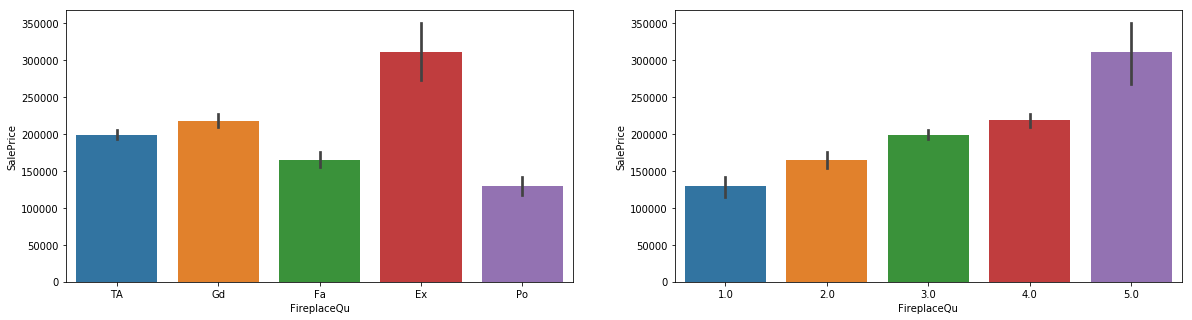

In [68]:
#kitchen Qual
plt.subplots(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train_c)
#we are going to encode FireplaceQu cuz is an ordinal which order metters
train_c['FireplaceQu'] = train_c['FireplaceQu'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
data_union['FireplaceQu'] = data_union['FireplaceQu'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
plt.subplot(1, 2, 2)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train_c)

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


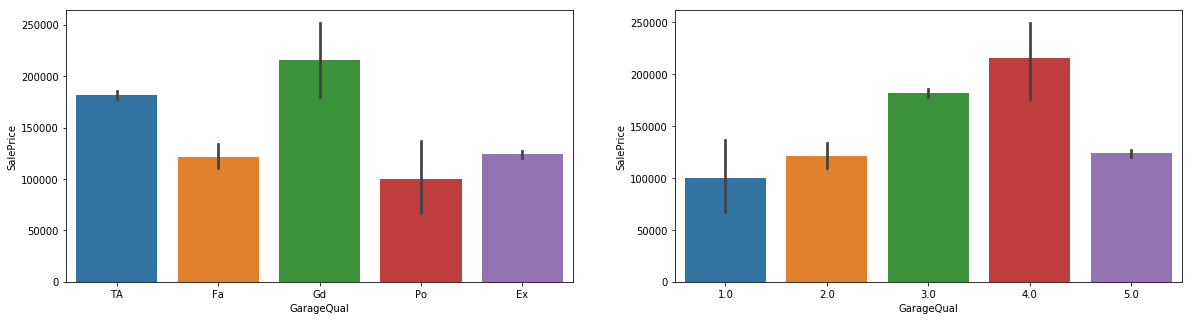

In [69]:
#Garage quality
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="GarageQual", y="SalePrice", data=train_c)
#will labelencode and order it
data_union['GarageQual'] = data_union['GarageQual'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
train_c['GarageQual'] = train_c['GarageQual'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
plt.subplot(1, 2, 2)
sns.barplot(x="GarageQual", y="SalePrice", data=train_c)

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


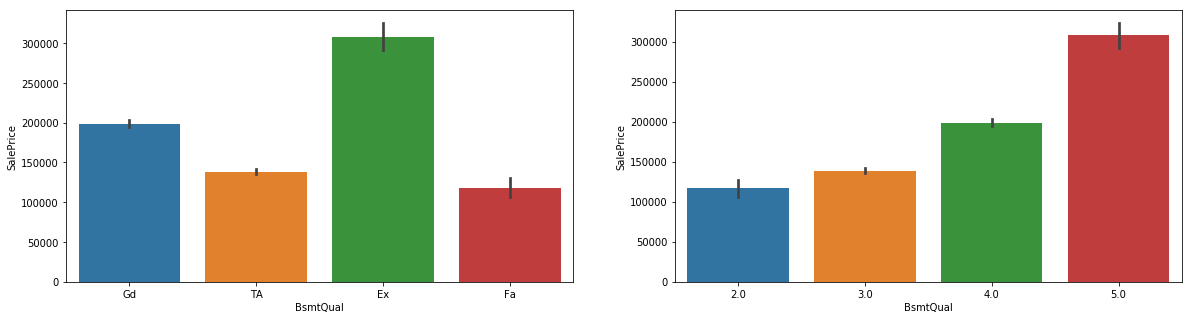

In [70]:
#Basament quality
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="BsmtQual", y="SalePrice", data=train_c)
#will labelencode and order it
data_union['BsmtQual'] = data_union['BsmtQual'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
train_c['BsmtQual'] = train_c['BsmtQual'].map({"No":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtQual", y="SalePrice", data=train_c)

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


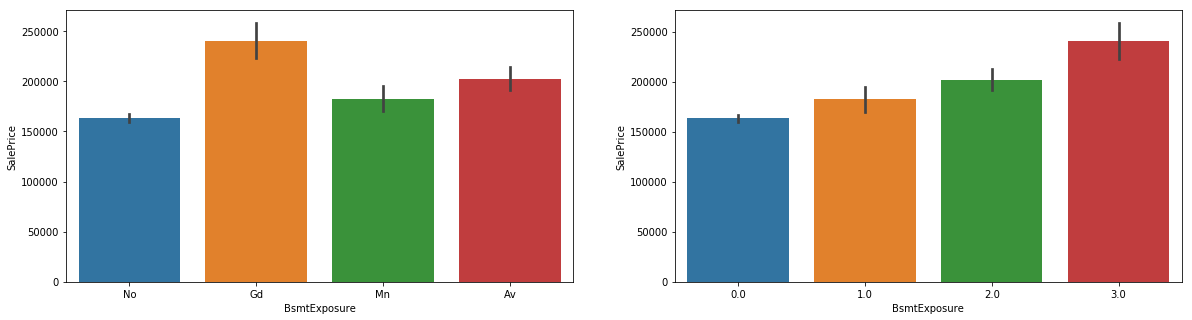

In [71]:
#Bsmt Exposure
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train_c)
#will labelencode and order it
data_union['BsmtExposure'] = data_union['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
train_c['BsmtExposure'] = train_c['BsmtExposure'].map({'No':0, 'Mn':1, 'Av':2, 'Gd':3})
plt.subplot(1, 2, 2)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train_c)

/home/diko/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


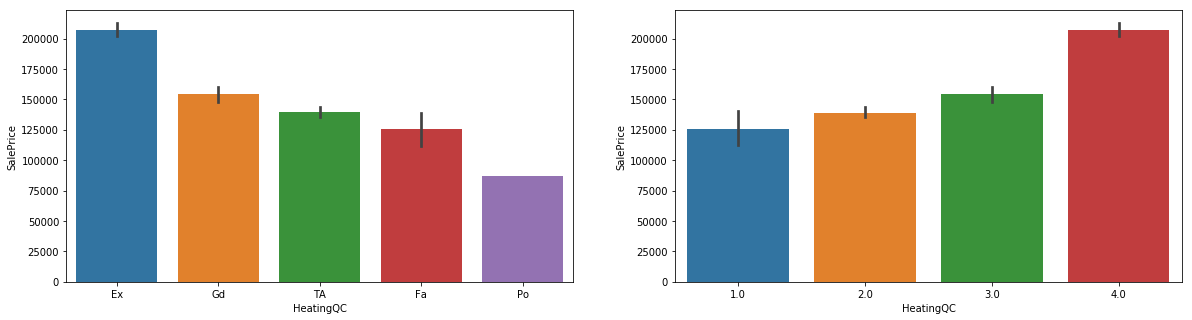

In [72]:
#heating quality
plt.subplots(figsize =(20, 5))
plt.subplot(1, 2, 1)
sns.barplot(x="HeatingQC", y="SalePrice", data=train_c)
# Label encode and order
train_c['HeatingQC'] = train_c.HeatingQC.map({
  "po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4  
})
data_union['HeatingQC'] = data_union.HeatingQC.map({
  "po":0,"Fa":1,"TA":2,"Gd":3,"Ex":4  
})
plt.subplot(1, 2, 2)
sns.barplot(x="HeatingQC", y="SalePrice", data=train_c)

In [73]:
# Label encoding for some other data that may be categorical
cols = ('BsmtCond',  'GarageCond', 'ExterQual', 'ExterCond','BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'CentralAir','Season')
# process columns, apply LabelEncoder to categorical features
for i in cols:
    label = LabelEncoder() 
    label.fit(list(data_union[i].values)) 
    data_union[i] = label.transform(list(data_union[i].values))

In [74]:
#transforming variables represented as intigers which actually are categorival variables
data_union['MSSubClass'] = data_union['MSSubClass'].astype(str)
data_union['YrSold'] = data_union['YrSold'].astype(str)
data_union['MoSold'] = data_union['MoSold'].astype(str)
data_union = pd.get_dummies(data_union)
print(data_union.shape)

(2858, 247)


In [75]:
#after the transformations that we did, new NA values may have been created
data_union.isna().values.any()

True

In [76]:
col_obj = data_union.loc[: ,data_union.isna().any() == True]
list_trai = list(col_obj)
list_trai

['HeatingQC', 'TotAbvGrBath']

In [77]:
#handling the new missing values
data_union['TotAbvGrBath'] = data_union['TotAbvGrBath'].fillna(data_union['TotAbvGrBath'].mean())
data_union['HeatingQC'] = data_union['HeatingQC'].fillna(data_union['TotAbvGrBath'].value_counts().idxmax())

In [78]:
#dividing the datasets in training and test
new_dataset = data_union[:train_number]
new_testset = data_union[train_number:]
print(new_dataset.shape)
print(new_testset.shape)

(1399, 247)
(1459, 247)


In [79]:
#The following method is for tuning the hyperparameters of our selected models using GridSearchCV
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [80]:
#grid search function
def train_model(model, param_grid=[], X=[], y=[], 
                splits=10, repeats=10):
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)
    
    if len(param_grid)>0:
        gsearch = GridSearchCV(model, param_grid, cv=rkfold,
                               scoring=rmse_scorer,
                               verbose=1, return_train_score=True)

        gsearch.fit(new_dataset.values,SalePrice.values)
        model = gsearch.best_estimator_        
        best_idx = gsearch.best_index_
        grid_results = pd.DataFrame(gsearch.cv_results_)       
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']

    # no grid search, just cross-val score for given model    
    else:
        grid_results = []
        cv_results = cross_val_score(model, new_dataset.values, SalePrice.values, scoring=rmse_scorer, cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
    
    # combine mean and std cv-score in to a pandas series
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    # predict y using the fitted model
    y_pred = model.predict(new_dataset.values)
    
    # print stats on model performance         
    print(model)
    print('cross_val: mean=',cv_mean,', std=',cv_std)
    return model, cv_score, grid_results

In [81]:
# places to store optimal models and scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])
splits =5
repeats = 5


In [82]:
#Lasso Grid search
model = 'Lasso'

opt_models[model] = Lasso()
alph_range = np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha': alph_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 575 out of 575 | elapsed:  1.9min finished


Lasso(alpha=0.00046000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cross_val: mean= 0.1104678513833616 , std= 0.007989005906681142


In [83]:
#Elastic Net Grid search results
model ='ElasticNet'
opt_models[model] = ElasticNet()

param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[1000]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=2)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 810 out of 810 | elapsed:  2.8min finished


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
cross_val: mean= 0.108799100253986 , std= 0.008423531171574078


In [84]:
#Random Forrest Grid Search
model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[100,150,200],
              'max_features':[25,50,75],
              'min_samples_split':[2,4,6]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=5, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=75, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
cross_val: mean= 0.12664630728900908 , std= 0.014567766434941253


In [85]:
#Gradient boost  grid search
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, 
                                              splits=splits, repeats=1)

cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.1min finished


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=350, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
cross_val: mean= 0.11859171661948671 , std= 0.005744384510229222


In [88]:
#Creating a dictionar which contains our models with their best parameters
opt_models =  {'Lasso': Lasso(alpha=0.00046000000000000007, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'ElasticNet': ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
          max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 'RandomForest': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=75, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False),
 'GradientBoosting': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=6, min_weight_fraction_leaf=0.0,
             n_estimators=350, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)}

In [89]:
opt_models['Lasso']

Lasso(alpha=0.00046000000000000007, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
#Function for plotting the learning curves of our models(best models)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = new_dataset
y = SalePrice

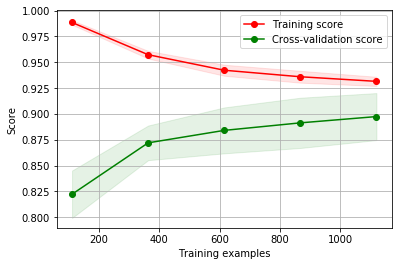

learning curve of GradientBoosting
Max accuracy 0.9023890371149627 GradientBoosting


<Figure size 432x288 with 0 Axes>

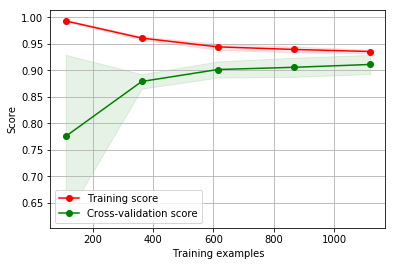

learning curve of Lasso
Max accuracy 0.9173222815020147 Lasso


<Figure size 432x288 with 0 Axes>

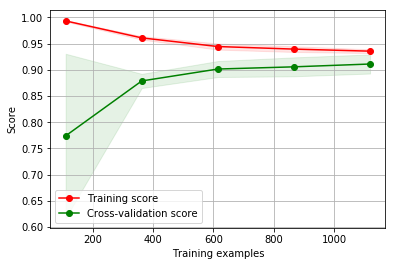

learning curve of ElasticNet
Max accuracy 0.9172965496548466 ElasticNet


<Figure size 432x288 with 0 Axes>

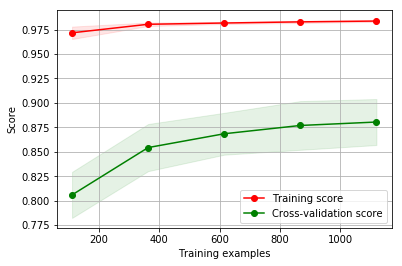

learning curve of RandomForest
Max accuracy 0.8853466213814295 RandomForest


<Figure size 432x288 with 0 Axes>

In [91]:
#findin the best model from the ones we did hyperparameter tuning, comparing them and plotting the learning curve
#of the best model in each iteration 
max_acc = 0 
models = ['GradientBoosting', 'Lasso', 'ElasticNet','RandomForest'] 
model = opt_models 
kfold = KFold(n_splits =10, random_state=7) 
for j in models: 
    predictor = model[j] 
    results = cross_val_score(predictor, new_dataset, SalePrice, cv = kfold) 
    
    max_acc = results.mean() 
    pred = j 
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) 
    title = j 
    plot_learning_curve(model[j], title, new_dataset.values, SalePrice.values, cv=cv, n_jobs=4) 
    plt.show()
    plt.savefig(j+'.png')
    print('learning curve of',j) 
    print('Max accuracy',max_acc, pred)

In [92]:
#Creating a stacking method (ensambling)
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [93]:
n_folds = 5
#Evaluation function (RMSE) for stacking
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(new_dataset.values)
    rmse= np.sqrt(-cross_val_score(model, new_dataset.values, SalePrice.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [94]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [95]:
#Evaluation of Stacked modelvusin RMSE with cross validation
stacked_averaged_models = StackingAveragedModels(base_models = (
                    opt_models['Lasso'],opt_models['ElasticNet'],
                    opt_models['RandomForest'],
                    opt_models['GradientBoosting']),
                    meta_model = opt_models['Lasso'] )

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1081 (0.0070)


<module 'matplotlib.pyplot' from '/home/diko/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

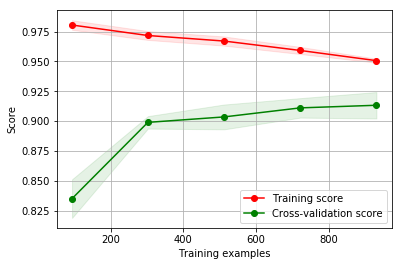

In [96]:
plot_learning_curve(stacked_averaged_models, "stacked model", new_dataset.values, SalePrice.values, n_jobs=4)

In [97]:
#makind the training and prediction of the stacked regressor
stacked_averaged_models.fit(new_dataset.values, SalePrice.values)
prediction = stacked_averaged_models.predict(new_testset.values)

In [ ]:
#Creation of submission files for our best picked models

In [98]:
#the best ensambling method, predicting with stacked_averaged_models, the file we submitted in kaggle, the results are shown on the paper or can check on kaggle page under 
# the team name Anxhelo Diko & Sidorela Mema
stacked = pd.DataFrame(prediction)
stacked.columns = ['SalePrice']
stacked.index = TestId
stacked.to_csv('submission_stacking_prediction.csv', header=True, index_label='Id')